In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotting import plot_decision_regions

In [2]:
# basic perceptron class for binary classification
# multi-class classification technique is also called One-versus-All(OvA)
# the Rosenblatt perceptron compares the true class labels to the predicted class labels
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # learning rate
        self.eta = eta
        # number of learning iterations
        self.n_iter = n_iter
        # random state seed
        self.random_state = random_state
    
    def fit(self, X, y):
        # random number generator that we seeded with user-specified random seed
        rgen = np.random.RandomState(self.random_state)
        # generate non 0 weights from normal distribution with std 0.01
        # iff all weights would be 0 eta would only affect the scale of the weights through learning
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # list off errors to check on overall performance
        self.errors_ = []
        
        # go through all iterations
        for _ in range (self.n_iter):
            # error value starts at 0
            errors = 0
            # go through all data
            for xi, target in zip(X, y):
                # update function - delta(w(i)) - (eta*(ytrue - ypredicted(i)) * x(i))
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # update the bias value
                self.w_[0] += update
                # if update is not perfect (!=0) append as error
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # Calculates wT*x and adds the bias value, w0
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # unit step function, Rosenblatt perceptron key feature
    def predict(self, X):
        # Ternary operation return(self.net_input(X) >= 0) ? 1 : -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)

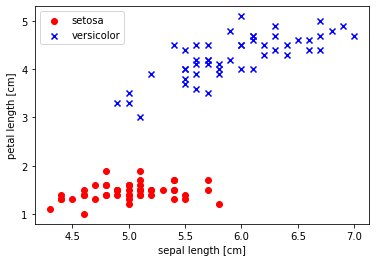

In [3]:
# load data into a pandas dataframe
# data is sorted
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# load first 100 rows and extract the class labesl
# -1 Iris-setosa
# 1 Iris-versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal and petal length X[0] = [5.1 1.4] ex.
X = df.iloc[0:100, [0, 2]].values

# plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

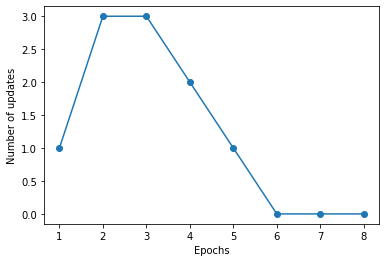

In [4]:
# create a Perceptron object with learning rate 0.1 and training epoch of 8
ppn = Perceptron(eta=0.1, n_iter=8)
# fit the data
ppn.fit(X, y)
# plot the errors, if converged to 0 the linear classifier found the decision boundary
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

(305, 235)


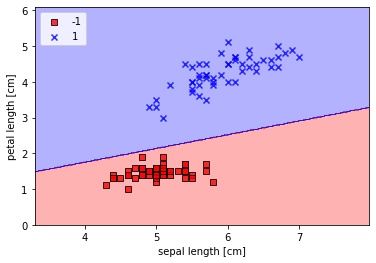

In [5]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()